#Problem 4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def fill_array(arr, a, b, n, f, h):
  x = np.linspace(a, b, n)
  arr = f(x)
  return x, arr

Here we can implement Newton-Cotes integration method similar to the previous assignment.

In [ ]:
def newton_cotes(x, y):
  h = x[1] - x[0]
  n = len(x)
  integral = y[0] + y[-1]
  integral += 4 * np.sum(y[1:n:2])
  integral += 2 * np.sum(y[2:n-1:2])

  derivative_4th = (y[:-4] - 4 * y[1:-3] + 6 * y[2:-2] - 4 * y[3:-1] + y[4:]) / h**4
  derivative_4th = max(abs(derivative_4th))
  error = derivative_4th*h**4/5

  return (h/3)*integral, error

In [ ]:
def f(x):
  return x + x**3

In [ ]:
y1 = np.zeros(5)

x1, y1 = fill_array(y1, 0, 1, 5, f, 1/5)

integral1, error1 = newton_cotes(x1, y1)
print("Integral = ", integral1)
print("Error = ", error1)

Integral =  0.75
Error =  0.0


We can see that the error is exactly zero.

Now we implement the same integration method for computing the probability from a wavefucntion $\psi(x, t) = \frac{1}{\sqrt{L}} [\sin{(\frac{\pi x}{L})} e^{-i \omega_1 t} + \sin{(\frac{2\pi x}{L})} e^{-i \omega_2 t}]$ for $0<x<L$.

In [ ]:
def P(x, L, omega1, omega2, t):
  psi = (np.sin(np.pi*x/L) * np.exp(-1j*omega1*t) + np.sin(2*np.pi*x/L) * np.exp(-1j*omega2*t))/np.sqrt(L)
  return np.abs(psi)**2

In [ ]:
L = 2
omega1 = 3; omega2 = 4.5; delta_omega = omega2 - omega1

In [ ]:
t = 0

probability_t0 = np.zeros(249)
error_t0 = np.zeros(249)
for i in range(249):
  n = 2*i + 5
  h = L/(4*n)
  x = np.linspace(3*L/4, L, n)
  y = P(x, L, omega1, omega2, t)
  probability_t0[i], error_t0[i] = newton_cotes(x, y)

In [ ]:
t = np.pi/delta_omega

probability_t1 = np.zeros(249)
error_t1 = np.zeros(249)
H = np.zeros(249)
for i in range(249):
  n = 2*i + 5
  h = L/(4*n)
  H[i] = np.log10(h)
  x = np.linspace(3*L/4, L, n)
  y = P(x, L, omega1, omega2, t)
  probability_t1[i], error_t1[i] = newton_cotes(x, y)

In [ ]:
print("n  log(E)  log(h) for t=0")
for i in range(249):
  print(2*i+5, np.log10(error_t0[i]), H[i])

n  log(E)  log(h) for t=0
5 -2.469571907333111 -1.0
7 -2.7816061980742655 -1.1461280356782382
9 -3.1946470182150324 -1.255272505103306
11 -3.5516228490882864 -1.3424226808222062
13 -3.855921875430055 -1.414973347970818
15 -4.118661801953019 -1.4771212547196626
17 -4.348938499358607 -1.5314789170422551
19 -4.553486469913044 -1.5797835966168101
21 -4.73672377050827 -1.6232492903979006
23 -4.9007446015115415 -1.662757831681574
25 -5.051380064322891 -1.6989700043360187
27 -5.1905419686894145 -1.7323937598229686
29 -5.319429595367904 -1.7634279935629373
31 -5.438570343775344 -1.792391689498254
33 -5.550462199531361 -1.8195439355418686
35 -5.655892861940468 -1.845098040014257
37 -5.755270720687287 -1.8692317197309762
39 -5.848798176821028 -1.8920946026904804
41 -5.937790906820837 -1.9138138523837167
43 -6.022646336086259 -1.9344984512435677
45 -6.103502303547161 -1.9542425094393248
47 -6.180475363633112 -1.9731278535996986
49 -6.254346784264404 -1.9912260756924949
51 -6.325344278711125 -2.00

In [ ]:
print("n  log(E)  log(h) for t=pi/delta_omega")
for i in range(249):
  print(2*i+5, np.log10(error_t1[i]), H[i])

n  log(E)  log(h) for t=pi/delta_omega
5 -2.2983745137231435 -1.0
7 -2.44289924643315 -1.1461280356782382
9 -2.8252926425648797 -1.255272505103306
11 -3.164463536423267 -1.3424226808222062
13 -3.4561038638338824 -1.414973347970818
15 -3.709148649281475 -1.4771212547196626
17 -3.931693904173892 -1.5314789170422551
19 -4.1299080381667155 -1.5797835966168101
21 -4.3083942826526895 -1.6232492903979006
23 -4.470619709031552 -1.662757831681574
25 -4.619238867409782 -1.6989700043360187
27 -4.756319912314597 -1.7323937598229686
29 -4.8835009999552765 -1.7634279935629373
31 -5.002099451741267 -1.792391689498254
33 -5.11318912498711 -1.8195439355418686
35 -5.217656185684931 -1.845098040014257
37 -5.3162399914943155 -1.8692317197309762
39 -5.409563540935819 -1.8920946026904804
41 -5.498156489863946 -1.9138138523837167
43 -5.582472790050279 -1.9344984512435677
45 -5.662904376822229 -1.9542425094393248
47 -5.739791916049752 -1.9731278535996986
49 -5.813433331282481 -1.9912260756924949
51 -5.8840906

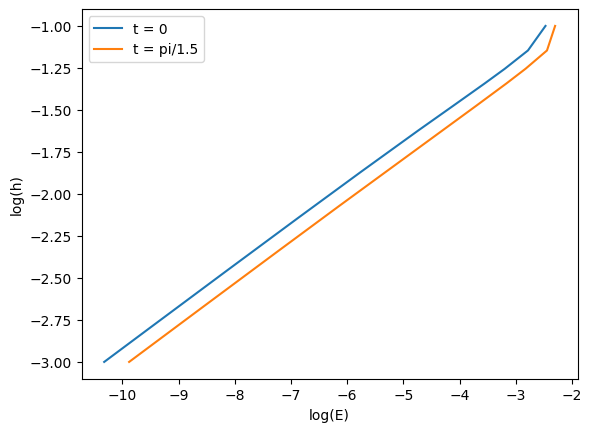

In [ ]:
N = np.arange(5, 502, 2)
plt.plot(np.log10(error_t0), H, label = 't = 0')
plt.plot(np.log10(error_t1), H, label = 't = pi/1.5')
plt.ylabel('log(h)')
plt.xlabel('log(E)')
plt.legend()
plt.show()

The graph above for $\log(h)$ vs $\log(E)$ shows that higher accuracy decrases error as expected.

#Problem 5

For the following functions can be solved using previous Newton-Cotes and trapezoid methods.

In [ ]:
def f1(x):
  return np.exp(x)*np.cos(x)

def f2(x):
  return np.exp(x)

def f3(x):
  return np.piecewise(x, [x < 0, x >= 0], [lambda x: np.exp(2*x), lambda x: x - 2*np.cos(x) + 4])

In [ ]:
real1 = (np.exp(np.pi/2) - 1)/2 #real values of integral from analytical integration
real2 = np.exp(3) - np.exp(-1)
real3 = 5 - np.exp(-2)/2 - 2*np.sin(1)

In [ ]:
def trapez(f, a, b, n, real_val):
  h = (b - a)/n
  I = f(a) + f(b)
  for i in range(1, n):
    I += 2*f(a + i*h)
  I = I*h/2
  error = abs((real_val - I)/real_val)
  return I, error

In [ ]:
ans_newton1 = np.zeros(249); ans_newton2 = np.zeros(249); ans_newton3 = np.zeros(249)
ans_trapez1 = np.zeros(249); ans_trapez2 = np.zeros(249); ans_trapez3 = np.zeros(249)
E_newton1 = np.zeros(249); E_newton2 = np.zeros(249); E_newton3 = np.zeros(249)
E_trapez1 = np.zeros(249); E_trapez2 = np.zeros(249); E_trapez3 = np.zeros(249)
H1 = np.zeros(249); H2 = np.zeros(249); H3 = np.zeros(249)

In [ ]:
for i in range(249):
  n = 2*i + 5
  H1[i] = np.pi/(2*n)
  x = np.linspace(0, np.pi/2, n)
  y = f1(x)
  ans_newton1[i], E_newton1[i] = newton_cotes(x, y)

  H2[i] = 4/n
  x = np.linspace(-1, 3, n)
  y = f2(x)
  ans_newton2[i], E_newton2[i] = newton_cotes(x, y)

  H3[i] = 2/n
  x = np.linspace(-1, 1, n)
  y = f3(x)
  ans_newton3[i], E_newton3[i] = newton_cotes(x, y)

  ans_trapez1[i], E_trapez1[i] = trapez(f1, 0, np.pi/2, n, real1)
  ans_trapez2[i], E_trapez2[i] = trapez(f2, -1, 3, n, real2)
  ans_trapez3[i], E_trapez3[i] = trapez(f3, -1, 1, n, real3)

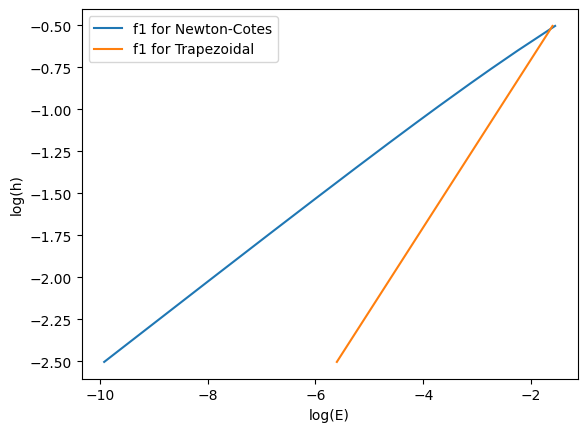

In [ ]:
plt.plot(np.log10(E_newton1), np.log10(H1), label = 'f1 for Newton-Cotes')
plt.plot(np.log10(E_trapez1), np.log10(H1), label = 'f1 for Trapezoidal')
plt.xlabel('log(E)'); plt.ylabel('log(h)')
plt.legend()
plt.show()

For the first function $f(x) = e^x \cos{(x)}$ Newton-Cotes gives less error than trapezoid method for all $h$.

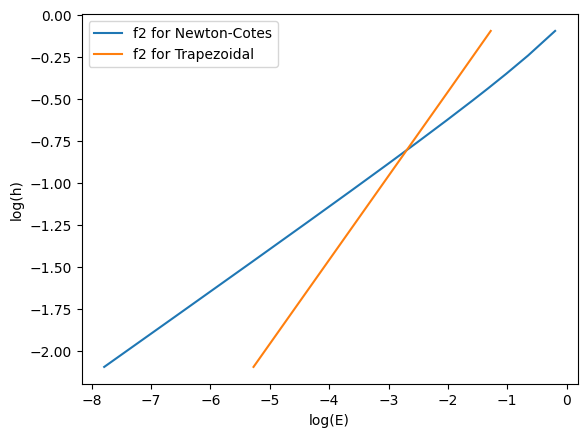

In [ ]:
plt.plot(np.log10(E_newton2), np.log10(H2), label = 'f2 for Newton-Cotes')
plt.plot(np.log10(E_trapez2), np.log10(H2), label = 'f2 for Trapezoidal')
plt.xlabel('log(E)'); plt.ylabel('log(h)')
plt.legend()
plt.show()

For the function $f(x) = e^x$ Newton-Cotes is less accurate up to a certain point.

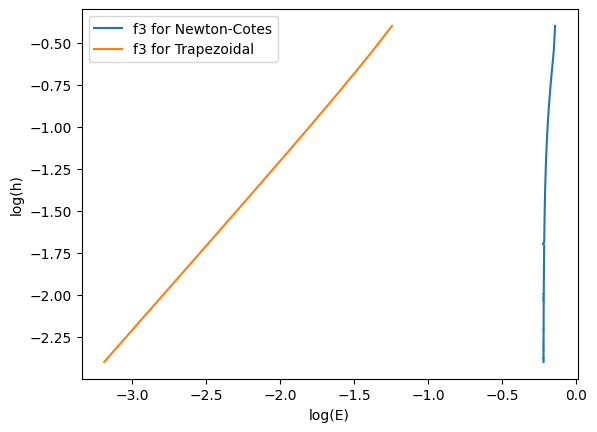

In [ ]:
plt.plot(np.log10(E_newton3), np.log10(H3), label = 'f3 for Newton-Cotes')
plt.plot(np.log10(E_trapez3), np.log10(H3), label = 'f3 for Trapezoidal')
plt.xlabel('log(E)'); plt.ylabel('log(h)')
plt.legend()
plt.show()

The third piecewise function shows bad accuracy for Newton-Cotes at all values of $h$.